# Core Imports and Setup

In [1]:
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("openff.toolkit").setLevel(logging.ERROR)

from openff import toolkit, evaluator

from openff.units import unit

# 0) Registering Custom ThermoML Properties

In [2]:
from openff.evaluator import properties
from openff.evaluator.datasets.thermoml import thermoml_property
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase

@thermoml_property("Osmotic coefficient", supported_phases=PropertyPhase.Liquid)
class OsmoticCoefficient(PhysicalProperty):
    """A class representation of a osmotic coeff property"""

    @classmethod
    def default_unit(cls):
        return unit.dimensionless
    
...

custom_thermoml_props = [
    OsmoticCoefficient,
]

for custom_prop_cls in custom_thermoml_props:    
    setattr(properties, custom_prop_cls.__name__, custom_prop_cls)

# 1) - Loading ThermoML Data Sets

## Extracting data from ThermoML

In [3]:
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase, PhysicalPropertyDataSet
from openff.evaluator.datasets.thermoml import thermoml_property, ThermoMLDataSet

data_set_initial = PhysicalPropertyDataSet.from_json("training-properties-with-water.json")
data_set_initial.to_pandas()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,Density Value (g / ml),Density Uncertainty (g / ml),EnthalpyOfMixing Value (kJ / mol),EnthalpyOfMixing Uncertainty (kJ / mol),Source
0,6385,298.15,101.0,Liquid,2,CN1CCCCC1,Solvent,0.24520,None,O,Solvent,0.75480,None,0.903811,NaN,NaN,NaN,10.1016/j.fluid.2010.05.001
1,6386,298.15,101.0,Liquid,2,CN1CCCCC1,Solvent,0.50500,None,O,Solvent,0.49500,None,0.858158,NaN,NaN,NaN,10.1016/j.fluid.2010.05.001
2,6387,298.15,101.0,Liquid,2,CN1CCCCC1,Solvent,0.79070,None,O,Solvent,0.20930,None,0.826047,NaN,NaN,NaN,10.1016/j.fluid.2010.05.001
3,6388,298.15,101.3,Liquid,2,CN(C)CCO,Solvent,0.26433,None,O,Solvent,0.73567,None,0.959000,NaN,NaN,NaN,10.1021/acs.jced.6b00888
4,6389,298.15,101.3,Liquid,2,CN(C)CCO,Solvent,0.50770,None,O,Solvent,0.49230,None,0.923722,NaN,NaN,NaN,10.1016/j.jct.2004.11.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,7294,298.15,101.0,Liquid,2,C1COCCN1,Solvent,0.49110,None,O,Solvent,0.50890,None,NaN,NaN,-3.131,NaN,10.1016/j.jct.2015.06.006
119,7295,298.15,101.0,Liquid,2,C1COCCN1,Solvent,0.71490,None,O,Solvent,0.28510,None,NaN,NaN,-1.753,NaN,10.1016/j.jct.2015.06.006
120,7344,303.15,100.0,Liquid,2,NCCCNCCCN,Solvent,0.30050,None,O,Solvent,0.69950,None,NaN,NaN,-6.588,NaN,10.1016/j.jct.2015.04.030
121,7345,303.15,100.0,Liquid,2,NCCCNCCCN,Solvent,0.49980,None,O,Solvent,0.50020,None,NaN,NaN,-5.544,NaN,10.1016/j.jct.2015.04.030


In [4]:
print(len(data_set_initial))
print(data_set_initial.property_types)
print(data_set_initial.substances)

123
{'Density', 'EnthalpyOfMixing'}
{<Substance OCC(O)CO{solv}{x=0.497800}|O{solv}{x=0.502200}>, <Substance Cc1ccncc1{solv}{x=0.750000}|O{solv}{x=0.250000}>, <Substance NCCNCCN{solv}{x=0.497400}|O{solv}{x=0.502600}>, <Substance CN1CCNCC1{solv}{x=0.510900}|O{solv}{x=0.489100}>, <Substance CN(C)CCCO{solv}{x=0.289504}|O{solv}{x=0.710496}>, <Substance CN1CCCCC1{solv}{x=0.505000}|O{solv}{x=0.495000}>, <Substance OCC(O)CO{solv}{x=0.749360}|O{solv}{x=0.250640}>, <Substance CNCCO{solv}{x=0.501700}|O{solv}{x=0.498300}>, <Substance NCCCO{solv}{x=0.272809}|O{solv}{x=0.727191}>, <Substance Cn1ccnc1{solv}{x=0.498200}|O{solv}{x=0.501800}>, <Substance CCN(CC)CCO{solv}{x=0.200800}|O{solv}{x=0.799200}>, <Substance OCCNCCO{solv}{x=0.700042}|O{solv}{x=0.299958}>, <Substance NCCNCCO{solv}{x=0.400100}|O{solv}{x=0.599900}>, <Substance CN(CCO)CCO{solv}{x=0.741100}|O{solv}{x=0.258900}>, <Substance CCN(CC)CCO{solv}{x=0.193290}|O{solv}{x=0.806710}>, <Substance Cc1cccnc1{solv}{x=0.500000}|O{solv}{x=0.500000}>, <

## Filtering data set

In [5]:
from openff.evaluator.datasets.curation.components.filtering import FilterByPropertyTypes, FilterByPropertyTypesSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByTemperature, FilterByTemperatureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByPressure, FilterByPressureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterBySmiles, FilterBySmilesSchema

data_set_hmix= FilterByPropertyTypes.apply(
    data_set_initial, FilterByPropertyTypesSchema(property_types=["EnthalpyOfMixing"]))

print(len(data_set_hmix))

57


### Inspecting and saving new properties

In [6]:
# save for future use
data_set_path = Path('filtered_dataset_hmix.json')
data_set_hmix.json(data_set_path, format=True)

# inspect new properties
pandas_data_set = data_set_hmix.to_pandas()
pandas_data_set.head()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,EnthalpyOfMixing Value (kJ / mol),EnthalpyOfMixing Uncertainty (kJ / mol),Source
0,6391,298.15,101.0,Liquid,2,CN(C)CCO,Solvent,0.2052,None,O,Solvent,0.7948,None,-2.587,None,10.1016/j.jct.2007.03.010
1,6392,298.15,101.0,Liquid,2,CN(C)CCO,Solvent,0.5365,None,O,Solvent,0.4635,None,-2.575,None,10.1016/j.jct.2007.03.010
2,6393,298.15,101.0,Liquid,2,CN(C)CCO,Solvent,0.7996,None,O,Solvent,0.2004,None,-1.247,None,10.1016/j.jct.2007.03.010
3,6395,303.15,100.0,Liquid,2,CCN(CC)CCO,Solvent,0.2008,None,O,Solvent,0.7992,None,-2.185,None,10.1016/j.jct.2015.04.030
4,6396,303.15,100.0,Liquid,2,CCN(CC)CCO,Solvent,0.5002,None,O,Solvent,0.4998,None,-2.504,None,10.1016/j.jct.2015.04.030


## 3) Analysing Data Sets

### Loading the Data Sets

In [7]:
def analysis_waters(filtered_data,estimated_data):
    
    experimental_data_set_path = filtered_data
    estimated_data_set_path = estimated_data

    experimental_data_set = PhysicalPropertyDataSet.from_json(experimental_data_set_path)
    estimated_data_set = PhysicalPropertyDataSet.from_json(estimated_data_set_path)

    properties_by_type = {
    "EnthalpyOfMixing": []
    }

    for experimental_property in experimental_data_set:

        # Find the estimated property which has the same id as the
        # experimental property.
        estimated_property = next(
            x for x in estimated_data_set if x.id == experimental_property.id
        )

        # Add this pair of properties to the list of pairs
        property_type = experimental_property.__class__.__name__
        properties_by_type[property_type].append((experimental_property, estimated_property))
    
    preferred_units = {
    # "Density": unit.kilogram / unit.meter ** 3,
    "EnthalpyOfMixing": unit.kilojoule / unit.mole
    }

    experimental_values = []
    estimated_values = []
    preferred_unit = preferred_units[property_type]
    
    for experimental_property, estimated_property in properties_by_type[property_type]:
        experimental_values.append(
            experimental_property.value.to(preferred_unit).magnitude
        )
        estimated_values.append(
            estimated_property.value.to(preferred_unit).magnitude
        )

    return experimental_values,estimated_values

In [8]:
# experimental_data_set.to_pandas().head()

In [9]:
# estimated_data_set.to_pandas().head()

## Plotting the results

In [10]:
estimated_values_TIP3P, experimental_values_TIP3P=analysis_waters("filtered_dataset_hmix.json","estimated_dataset_hmix_TIP3P.json")
estimated_values_OPC3, experimental_values_OPC3=analysis_waters("filtered_dataset_hmix.json","estimated_dataset_hmix_OPC3.json")

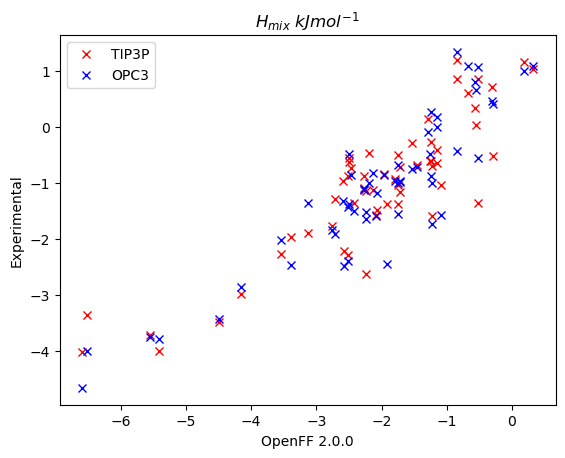

In [12]:
import matplotlib.pyplot as plt

plt.plot(estimated_values_TIP3P, experimental_values_TIP3P, marker='x', linestyle='None', color='r', label='TIP3P')
plt.plot(estimated_values_OPC3, experimental_values_OPC3, marker='x', linestyle='None', color='b',label='OPC3')
plt.xlabel('OpenFF 2.0.0')
plt.ylabel('Experimental')
plt.title('$H_{mix}$ $kJ mol^{-1}$')
plt.legend()
plt.savefig('expvsest_plot.png')
plt.show()

In [24]:
# from matplotlib import pyplot

# Create the figure we will plot to.
# figure, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(8.0, 4.0))

# # Set the axis titles
# axes[0].set_xlabel('OpenFF 1.0.0')
# axes[0].set_ylabel('Experimental')
# axes[0].set_title('Density $kg m^{-3}$')

# axes[1].set_xlabel('OpenFF 1.0.0')
# axes[1].set_ylabel('Experimental')
# axes[1].set_title('$H_{mix}$ $kJ mol^{-1}$')

# # Define the preferred units of the properties
# from openff.units import unit

# preferred_units = {
#     # "Density": unit.kilogram / unit.meter ** 3,
#     "EnthalpyOfMixing": unit.kilojoule / unit.mole
# }

# for index, property_type in enumerate(properties_by_type):

#     experimental_values = []
#     estimated_values = []

#     preferred_unit = preferred_units[property_type]

#     # Convert the values of our properties to the preferred units.
#     for experimental_property, estimated_property in properties_by_type[property_type]:

#         experimental_values.append(
#             experimental_property.value.to(preferred_unit).magnitude
#         )
#         estimated_values.append(
#             estimated_property.value.to(preferred_unit).magnitude
#         )

#     axes[index].plot(
#         estimated_values, experimental_values, marker='x', linestyle='None'
#     )
